French as a Second Language enrolment (2023-2024 Academic Year)

Date range: September 1, 2023 - August 31, 2024 

https://data.ontario.ca/dataset/french-as-a-second-language-enrolment

Data about the number of English-language students enrolled in French as a Second Language (FSL) classes. Information is broken down by elementary and secondary panels for each district school board.

Includes:

-    board number
-    board name
-    FSL - core elementary enrolment
-    FSL - core secondary enrolment
-    FSL - core total enrolment
-    FSL - extended elementary enrolment
-    FSL - extended secondary enrolment
-    FSL - extended total enrolment
-    FSL - immersion elementary enrolment
-    FSL - immersion secondary enrolment
-    FSL - immersion total enrolment
-    FSL - total elementary enrolment
-    FSL - total secondary enrolment
-    total FSL enrolment

FSL data is reported by schools to the Ontario School Information System (OnSIS), October Submissions.

The following English-language school types are included:

-    public
-    catholic


In [2]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import PIL
import requests
os.chdir('/Users/Lore/Desktop/DSI/my_notes/visualization/')

In [3]:
data = pd.read_csv('fsl_enrolment_by_board_2023-2024_en.txt', sep="|", header='infer')
data

,Board Number,Board Name,ElementaryFSL - Core,SecondaryFSL - Core,FSL-Core Total,ElementaryFSL - Extended,SecondaryFSL - Extended,FSL-Extended Total,ElementaryFSL - Immersion,SecondaryFSL - Immersion,FSL-Immersion Total,Total Elementary,Total Secondary,Overall Total
0,B28010,Algoma DSB,4310,405.0,4715,NaN,NaN,NaN,1155.0,235.0,1390.0,5465,640.0,6105
1,B67202,Algonquin and Lakeshore CDSB,5660,450.0,6110,NaN,60,60,1455.0,160.0,1615.0,7115,665.0,7780
2,B66010,Avon Maitland DSB,5020,710.0,5730,NaN,NaN,NaN,425.0,60.0,485.0,5445,770.0,6215
3,B66001,Bluewater DSB,6095,520.0,6615,NaN,NaN,NaN,1885.0,350.0,2235.0,7980,870.0,8850
4,B67164,Brant Haldimand Norfolk CDSB,3700,1225.0,4925,NaN,65,65,895.0,NaN,895.0,4595,1290.0,5885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,B67130,Wellington CDSB,3175,595.0,3770,NaN,NaN,NaN,NaN,NaN,NaN,3175,595.0,3770
58,B67024,Windsor-Essex CDSB,6560,1275.0,7835,NaN,NaN,NaN,2165.0,755.0,2920.0,8725,2030.0,10760
59,B67075,York CDSB,22915,3095.0,26010,NaN,NaN,NaN,2965.0,765.0,3730.0,25875,3860.0,29740
60,B66095,York Region DSB,40985,13545.0,54530,NaN,NaN,NaN,11365.0,3105.0,14470.0,52345,16650.0,69000


In [4]:
# remove spaces from colnames
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('-', '')
data.columns

Index(['BoardNumber', 'BoardName', 'ElementaryFSLCore', 'SecondaryFSLCore',
       'FSLCoreTotal', 'ElementaryFSLExtended', 'SecondaryFSLExtended',
       'FSLExtendedTotal', 'ElementaryFSLImmersion', 'SecondaryFSLImmersion',
       'FSLImmersionTotal', 'TotalElementary', 'TotalSecondary',
       'OverallTotal'],
      dtype='object')

In [5]:
# select top 10 OverallTotal and exclude last row because it is provincial total
sorted_data = data.sort_values(by=['OverallTotal'], ascending = False)[-61:]
sorted_data

,BoardNumber,BoardName,ElementaryFSLCore,SecondaryFSLCore,FSLCoreTotal,ElementaryFSLExtended,SecondaryFSLExtended,FSLExtendedTotal,ElementaryFSLImmersion,SecondaryFSLImmersion,FSLImmersionTotal,TotalElementary,TotalSecondary,OverallTotal
51,B66052,Toronto DSB,70650,20435.0,91085,1545.0,1750,3290,19400.0,3355.0,22755.0,91590,25540.0,117135
60,B66095,York Region DSB,40985,13545.0,54530,NaN,NaN,NaN,11365.0,3105.0,14470.0,52345,16650.0,69000
35,B66125,Peel DSB,47670,5560.0,53230,290.0,225,515,12620.0,1645.0,14265.0,60585,7430.0,68015
34,B66184,Ottawa-Carleton DSB,17335,3935.0,21270,NaN,NaN,NaN,32955.0,8000.0,40955.0,50290,11930.0,62225
50,B67059,Toronto CDSB,44085,7395.0,51480,NaN,740,740,5015.0,360.0,5375.0,49095,8495.0,57590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,B29050,Kenora CDSB,330,30.0,360,NaN,NaN,NaN,260.0,55.0,315.0,590,85.0,675
39,B28053,Rainy River DSB,485,140.0,625,NaN,NaN,NaN,NaN,NaN,NaN,485,140.0,625
46,B29076,Superior North CDSB,450,NaN,450,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN,450
47,B28070,Superior-Greenstone DSB,245,105.0,350,NaN,NaN,NaN,NaN,NaN,NaN,245,105.0,350


In [6]:
# make new column differentiating between public vs catholic vs other
sorted_data['SchoolType'] = sorted_data.apply(
    lambda row: 'catholic' if 'CDSB' in row['BoardName'] 
    else ('catholic' 
    if 'CSB' in row['BoardName'] 
    else ('public' 
    if 'DSB' in row['BoardName'] 
    else 'other')),
    axis=1
)
sorted_data['SchoolType'] = pd.Categorical(sorted_data.SchoolType)
sorted_data

,BoardNumber,BoardName,ElementaryFSLCore,SecondaryFSLCore,FSLCoreTotal,ElementaryFSLExtended,SecondaryFSLExtended,FSLExtendedTotal,ElementaryFSLImmersion,SecondaryFSLImmersion,FSLImmersionTotal,TotalElementary,TotalSecondary,OverallTotal,SchoolType
51,B66052,Toronto DSB,70650,20435.0,91085,1545.0,1750,3290,19400.0,3355.0,22755.0,91590,25540.0,117135,public
60,B66095,York Region DSB,40985,13545.0,54530,NaN,NaN,NaN,11365.0,3105.0,14470.0,52345,16650.0,69000,public
35,B66125,Peel DSB,47670,5560.0,53230,290.0,225,515,12620.0,1645.0,14265.0,60585,7430.0,68015,public
34,B66184,Ottawa-Carleton DSB,17335,3935.0,21270,NaN,NaN,NaN,32955.0,8000.0,40955.0,50290,11930.0,62225,public
50,B67059,Toronto CDSB,44085,7395.0,51480,NaN,740,740,5015.0,360.0,5375.0,49095,8495.0,57590,catholic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,B29050,Kenora CDSB,330,30.0,360,NaN,NaN,NaN,260.0,55.0,315.0,590,85.0,675,catholic
39,B28053,Rainy River DSB,485,140.0,625,NaN,NaN,NaN,NaN,NaN,NaN,485,140.0,625,public
46,B29076,Superior North CDSB,450,NaN,450,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN,450,catholic
47,B28070,Superior-Greenstone DSB,245,105.0,350,NaN,NaN,NaN,NaN,NaN,NaN,245,105.0,350,public


Text(0.5, 0, 'Board Type')

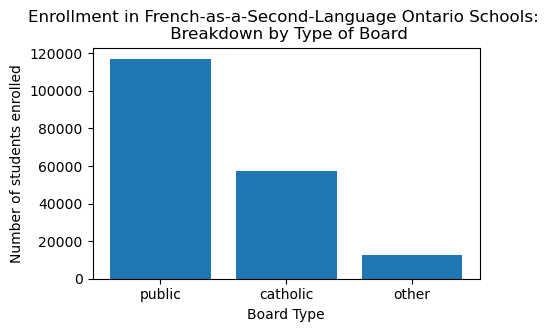

In [9]:
fig, ax = plt.subplots(figsize = (5, 3))
ax.bar(sorted_data['SchoolType'], sorted_data['OverallTotal'])
ax.set_title('Enrollment in French-as-a-Second-Language Ontario Schools: \n Breakdown by Type of Board')
ax.set_ylabel('Number of students enrolled')
ax.set_xlabel('Board Type')

In [17]:
# subset data, set x and y variables
subset_data = sorted_data[['BoardName', 'TotalElementary', 'TotalSecondary', 'OverallTotal', 'SchoolType']].head(15)
subset_data

,BoardName,TotalElementary,TotalSecondary,OverallTotal,SchoolType
51,Toronto DSB,91590,25540.0,117135,public
60,York Region DSB,52345,16650.0,69000,public
35,Peel DSB,60585,7430.0,68015,public
34,Ottawa-Carleton DSB,50290,11930.0,62225,public
50,Toronto CDSB,49095,8495.0,57590,catholic
15,Halton DSB,37865,5020.0,42885,public
33,Ottawa CSB,33300,7480.0,40780,catholic
56,Waterloo Region DSB,35525,3960.0,39485,public
11,Durham DSB,30740,8495.0,39240,public
48,Thames Valley DSB,31825,4930.0,36755,public


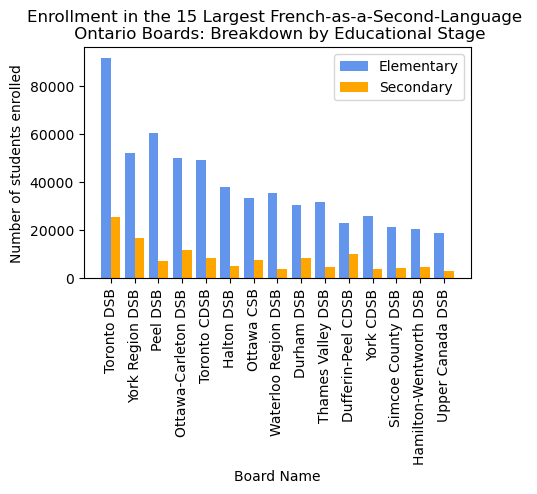

In [ ]:
# Bar width and x locations
w, x = 0.4, np.arange(len(subset_data['BoardName']))

fig, ax = plt.subplots(figsize = (5, 3))
#fig, ax = plt.subplots(layout='constrained')
ax.bar(x - w/2, subset_data['TotalElementary'], width=w, label='Elementary', color = 'cornflowerblue')
ax.bar(x + w/2, subset_data['TotalSecondary'], width=w, label='Secondary', color = 'orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Enrollment in the 15 Largest French-as-a-Second-Language \n Ontario Boards: Breakdown by Educational Stage')
ax.set_ylabel('Number of students enrolled')
ax.set_xlabel('Board Name')
ax.set_xticks(x)
ax.legend(loc='upper right')
ax.set_xticklabels(subset_data['BoardName'])
plt.xticks(rotation = 90, ha = 'center')

# Trying to insert reference
#ax.set_ylim(0.0, 96169.5)
#ax.text(10, 42, 'Reference: ', ha='right')
#ax.get_xlim() #(-0.8900000000000001, 9.89)
#ax.get_ylim() # (0.0, 96169.5)

# SAVING VISUALIZATIONS
path = '/Users/Lore/Desktop/DSI/visualization/02_activities/assignments'
filename = '/assignment3_fig2.png'
plt.savefig(path + filename, dpi = 300)